ECOMMERCE SALES DATA ANALYSIS

PART 1. DATA REPROCESSING IN PYTHON

1.LOAD THE DATASET

a. Import the Amazon.csv dataset into a pandas dataframe 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import os 
print (os.getcwd())

c:\Users\Administrator\OneDrive\Desktop\New folder\AMAZON 2


In [11]:
df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\New folder\AMAZON 2\amazon.csv")
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [12]:
df.shape

(1465, 16)

In [13]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,26,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08WRWPM22,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [14]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

C. Check for missing numbers and hanlde them appropriately

In [16]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
import pandas as pd

# Sample DataFrame for demonstration
data = {'rating_count': ['1,234', '5,678', '9,012', 'invalid', '3,456']}
df = pd.DataFrame(data)

df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

print(df.head())
print(df.dtypes)

   rating_count
0          1234
1          5678
2          9012
3             0
4          3456
rating_count    int64
dtype: object


2. DATA CLEANING

A. Convert price-related columns (discounted-price, actual-price)to numerical format

In [20]:

 df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '')
df['discounted_price'] = df['discounted_price'].str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '')
df['actual_price'] = df['actual_price'].str.replace(',', '').astype(float)

print(df.head()) #display the first few rows
print(df.dtypes)


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price discount_percentage rating  rating_count  \
0        1099.0                 64%    4.2         24269   
1         349.0           

3. DATA TRANSFORMATION

A. Create a new column for discount_amount (actual_price-discounted_price)

In [ ]:

data = {'actual_price': [1099, 349, 1899, 699, 399],'discounted_price': [399, 199, 199, 329, 154]}
df = pd.DataFrame(data)

# Create a new column 'discount_amount'
df['discount_amount'] = df['actual_price'] - df['discounted_price']

print(df)

   actual_price  discounted_price  discount_amount
0          1099               399              700
1           349               199              150
2          1899               199             1700
3           699               329              370
4           399               154              245


B. Convert discount_percentage into a numeric value

In [50]:
df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\New folder\AMAZON 2\amazon.csv")
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [51]:
import pandas as pd
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                  64    4.2       24,269   
1         ₹349                  43  

2.C. Extract relevant product categories from the category column

In [52]:
df['category']
print(df['category'])

0       Computers&Accessories|Accessories&Peripherals|...
1       Computers&Accessories|Accessories&Peripherals|...
2       Computers&Accessories|Accessories&Peripherals|...
3       Computers&Accessories|Accessories&Peripherals|...
4       Computers&Accessories|Accessories&Peripherals|...
                              ...                        
1460    Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...
1461    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1462    Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...
1463    Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...
1464    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
Name: category, Length: 1465, dtype: object


2.B. Convert rating_count to integer values (remove commas if present)

In [53]:
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)
print(df.head())
print(df.dtypes)

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating  rating_count  \
0       ₹1,099                  64    4.2         24269   
1         ₹349                  43

3.D. Extract the year of reviews if a timestamp is present

In [57]:
img_link = df['img_link']

print(img_link.head())

0    https://m.media-amazon.com/images/W/WEBP_40237...
1    https://m.media-amazon.com/images/W/WEBP_40237...
2    https://m.media-amazon.com/images/W/WEBP_40237...
3    https://m.media-amazon.com/images/I/41V5FtEWPk...
4    https://m.media-amazon.com/images/W/WEBP_40237...
Name: img_link, dtype: object


In [62]:
import pandas as pd
import re

data = {'img_link': ['https://m.media-amazon.com/images/W/WEBP_40237...', 'https://m.media-amazon.com/images/W/WEBP_40237...', 'https://m.media-amazon.com/images/I/41V5FtEWPk...', 'https://m.media-amazon.com/images/W/WEBP_40237...','https://m.media-amazon.com/images/W/WEBP_40237...',]}

df = pd.DataFrame(data)

# Function to extract year from review link
def extract_year(link):
    match = re.search(r'/(\d{4})/', link)
    if match:
        return int(match.group(1))
    return None

# Apply the function to the 'img_link' column and create a new column 'img_year'
df['img_year'] = df['img_link'].apply(extract_year)

# Print the DataFrame to verify
print(df)

                                            img_link img_year
0  https://m.media-amazon.com/images/W/WEBP_40237...     None
1  https://m.media-amazon.com/images/W/WEBP_40237...     None
2  https://m.media-amazon.com/images/I/41V5FtEWPk...     None
3  https://m.media-amazon.com/images/W/WEBP_40237...     None
4  https://m.media-amazon.com/images/W/WEBP_40237...     None


PART 3. DATA ANALYSIS IN PYTHON 

6. EXPLORATORY DATA ANALYSIS (EDA)

A. Show the distribution of ratings using a histogram

In [64]:
df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\New folder\AMAZON 2\amazon.csv")
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

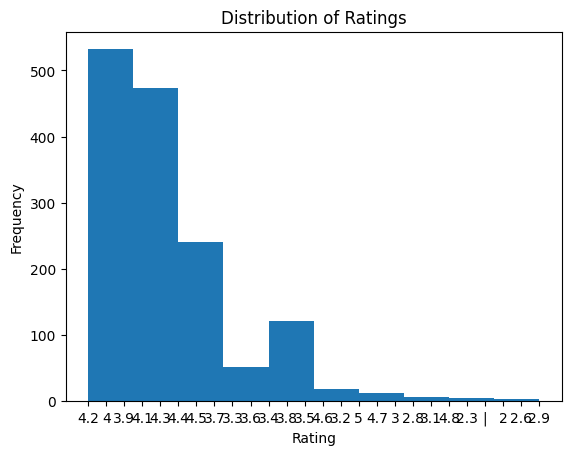

In [65]:
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

B. Find the correlation between discount_percentage and rating

In [75]:
import pandas as pd

data = {'discount_percentage': ['64%', '43%', '90%', '53%', '61%'],'rating': [4.2, 4, 3.9, 4.2, 4.2]}
df = pd.DataFrame(data)

# Convert the 'discount_percentage' column to strings
df['discount_percentage'] = df['discount_percentage'].astype(str)

# Remove the '%' character and convert to numeric
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Print the DataFrame to verify
print(df)

# Calculate the correlation between 'discount_percentage' and 'rating'
correlation = df['discount_percentage'].corr(df['rating'])
print(f"Correlation between discount_percentage and rating: {correlation}")

   discount_percentage  rating
0                 64.0     4.2
1                 43.0     4.0
2                 90.0     3.9
3                 53.0     4.2
4                 61.0     4.2
Correlation between discount_percentage and rating: -0.45349632967310133


C. Identify the top selling product categories

In [ ]:
top_categories = df['category'].value_counts().head(5)

print("top-selling_categories:\n", top_categories)

top-selling_categories:
 category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    233
Electronics|WearableTechnology|SmartWatches                                           76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          52
Name: count, dtype: int64


D. Analyze the relationship between discount and rating_count 

In [86]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\New folder\AMAZON 2\amazon.csv")
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

Columns in the DataFrame: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
First few rows of the DataFrame after cleaning:
    product_id                                       product_name  \
20  B09C6HXFC1  Duracell USB Lightning Apple Certified (Mfi) B...   
28  B09W5XR9RT  Duracell USB C To Lightning Apple Certified (M...   
32  B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
33  B008FWZGSG  Samsung Original Type C to C Cable - 3.28 Feet...   
37  B09RZS1NQT  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...   

                                             category discounted_price  \
20  Computers&Accessories|Accessories&Peripherals|...             ₹970   
28  Computers&Accessories|Accessories&Peripherals|...             ₹97

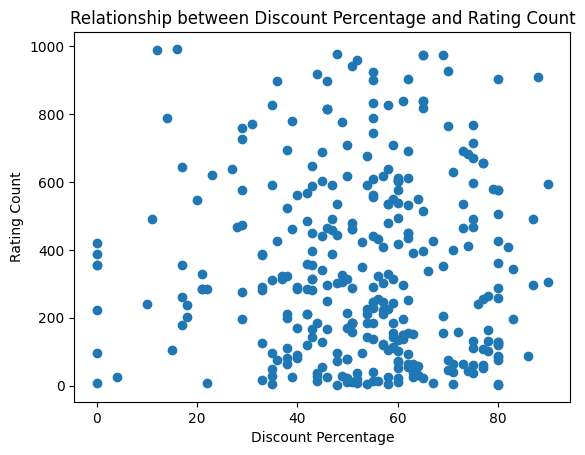

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from a CSV file'
df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\New folder\AMAZON 2\amazon.csv")

# Print the column names to verify the columns exist
print("Columns in the DataFrame:", df.columns)

#reconfirm the existence of the columns
if 'discount_percentage' in df.columns and 'rating_count' in df.columns:

#Convert the 'discount_percentage' column to string
df['discount_percentage'] = df['discount_percentage'].astype(str)

#convert to numeric
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].str.replace('%', ''), errors='coerce')
    

#Convert 'rating_count' to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
    
#Drop rows with NaN values in 'discount_percentage' or 'rating_count'
df = df.dropna(subset=['discount_percentage', 'rating_count'])
    
#Print the first few rows to verify the data
 print("First few rows of the DataFrame after cleaning:")
 print(df.head())
    
#Calculate the correlation between 'discount_percentage' and 'rating_count'
correlation = df['discount_percentage'].corr(df['rating_count'])
print(f"Correlation between discount_percentage and rating_count: {correlation}")
    
#Visualize the relationship with a scatter plot
plt.scatter(df['discount_percentage'], df['rating_count'])
plt.xlabel('Discount Percentage')
plt.ylabel('Rating Count')
plt.title('Relationship between Discount Percentage and Rating Count')
plt.show()

7. DATA VISUALIZATION

A. Create a bar chart showing the top 10 highest-rated products.

In [101]:
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)
print(top_rated_products)

      product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
775   B09ZHCJDP1  Amazon Basics Wireless Mouse | 2.4 GHz Connect...   
174   B0BP7XLX48  Syncwire LTG to USB Cable for Fast Charging Co...   
1201  B0BQ3K23Y1  Oratech Coffee Frother electric, milk frother ...   
1226  B0BLC2BYPX  Zuvexa USB Rechargeable Electric Foam Maker - ...   
1119  B09JN37WBX  Lint Remover Woolen Clothes Lint Extractor Bat...   
1216  B0BN6M3TCM  VRPRIME Lint Roller Lint Remover for Clothes, ...   
1293  B09P1MFKG1  Melbon VM-905 2000-Watt Room Heater (ISI Certi...   
1007  B0B9BXKBC7  WeCool S5 Long Selfie Stick, with Large Reinfo...   
1289  B0BJ966M5K  Aquadpure Copper + Mineral RO+UV+UF 10 to 12 L...   

                                               category discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...           ₹2,099   
775   Computers&Accessories|Accessories&Peripherals|...           

Text(0.5, 1.0, 'Top 10 Highest Rated Products')

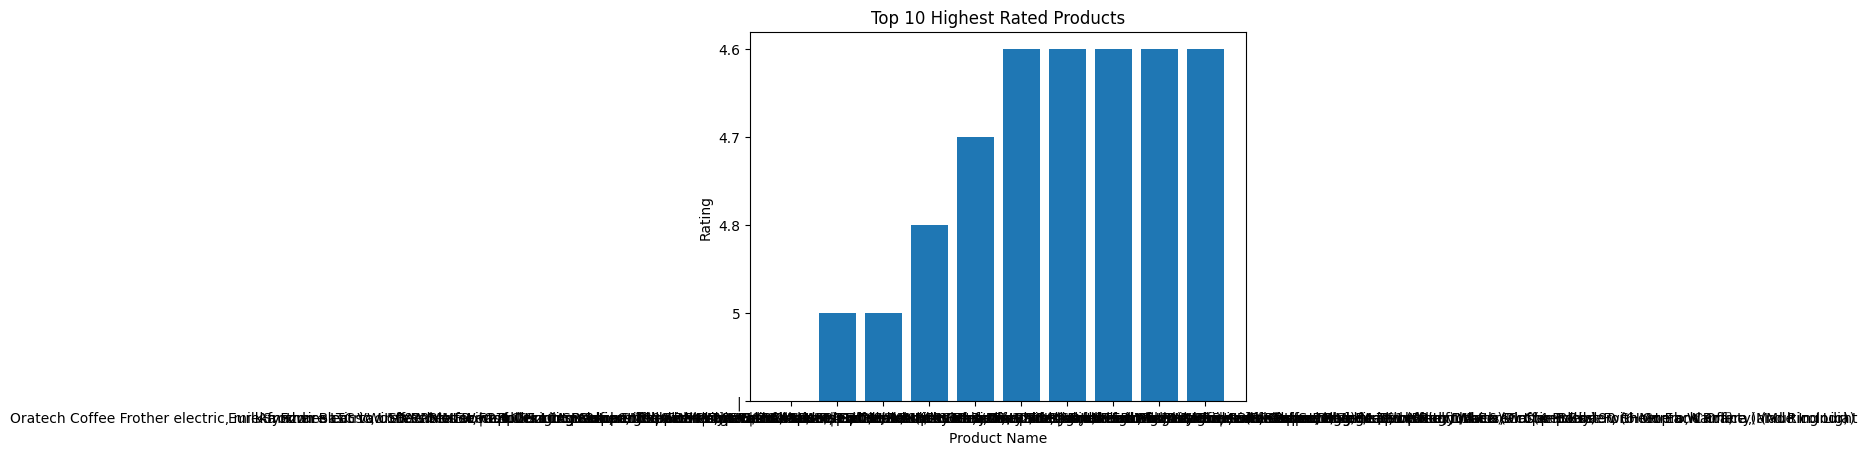

In [102]:
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)
plt.bar(top_rated_products['product_name'], top_rated_products['rating'])
plt.xlabel('Product Name')
plt.ylabel('Rating')
plt.title('Top 10 Highest Rated Products')

B. Plot a scatter plot of discount_percentage vs rating

Columns in the DataFrame: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
First few rows of the DataFrame after cleaning:
    product_id                                       product_name  \
20  B09C6HXFC1  Duracell USB Lightning Apple Certified (Mfi) B...   
28  B09W5XR9RT  Duracell USB C To Lightning Apple Certified (M...   
32  B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
33  B008FWZGSG  Samsung Original Type C to C Cable - 3.28 Feet...   
37  B09RZS1NQT  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...   

                                             category discounted_price  \
20  Computers&Accessories|Accessories&Peripherals|...             ₹970   
28  Computers&Accessories|Accessories&Peripherals|...             ₹97

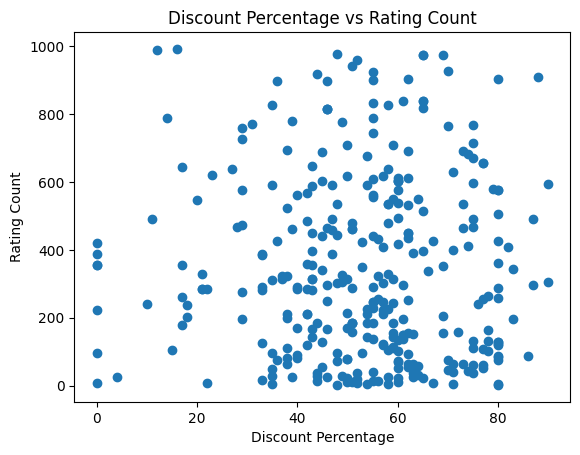

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Load the dataset from a CSV file
df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\New folder\AMAZON 2\amazon.csv")

#Print the column names to verify the columns exist
print("Columns in the DataFrame:", df.columns)

#Check for the existence of the columns
if 'discount_percentage' in df.columns and 'rating_count' in df.columns:

#Convert the 'discount_percentage' column to strings
df['discount_percentage'] = df['discount_percentage'].astype(str)

#Convert to numeric
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].str.replace('%', ''), errors='coerce')

#Convert 'rating_count' to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

#Drop rows with NaN values in 'discount_percentage' or 'rating_count'
df = df.dropna(subset=['discount_percentage', 'rating_count'])

#Print the first few rows to verify the data
print("First few rows of the DataFrame after cleaning:")
print(df.head())

#Calculate the correlation between 'discount_percentage' and 'rating_count'
correlation = df['discount_percentage'].corr(df['rating_count'])
print(f"Correlation between discount_percentage and rating_count: {correlation}")

 #Visualize the relationship with a scatter plot
plt.scatter(df['discount_percentage'], df['rating_count'])
plt.xlabel('Discount Percentage')
plt.ylabel('Rating Count')
plt.title('Discount Percentage vs Rating Count')


C. Show the top-selling categories using a pie chart

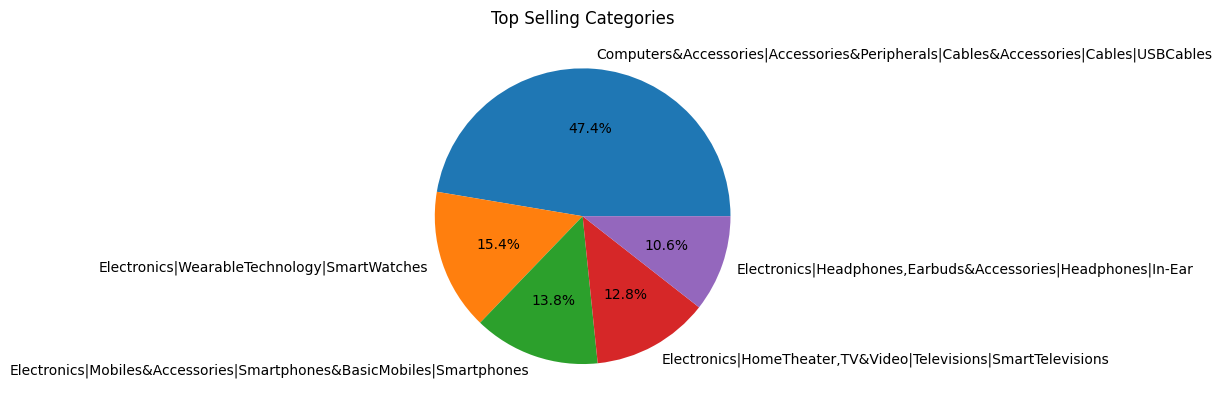

In [109]:
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%')
plt.title('Top Selling Categories')
plt.show()

D. Use a heatmap to show correlations between numerical columns

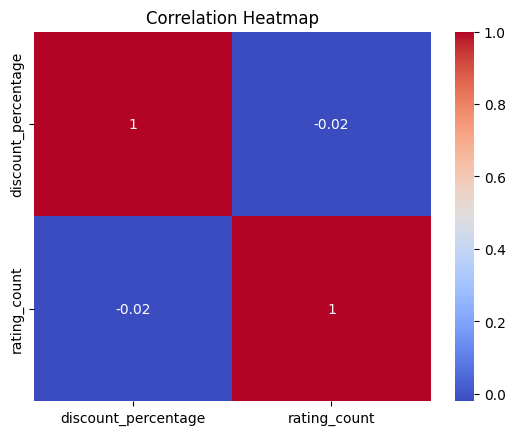

In [110]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

### PART 2 : MYSQL DATABASE INTERGRATION 

### Create a MYSQL database

### set up a mysql databasa (ecommerce_db)

In [6]:
import pandas as pd
import mysql.connector

df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\TITANIC\AMAZON 2\amazon.csv")

df["discounted_price"] = df["discounted_price"].str.replace("₹", "").str.replace(",", "").astype(float)
df["actual_price"] = df["actual_price"].str.replace("₹", "").str.replace(",", "").astype(float)
df["rating_count"] = df["rating_count"].astype(str).str.replace(",", "").replace("nan","0").fillna("0").astype(int)



conn = mysql.connector.connect(host="localhost", user="root", password="Joy@12345", database="products")

cursor = conn.cursor()

for _, row in df.iterrows():
    sql = """
INSERT IGNORE INTO products(
    product_id, product_name, category, discounted_price, actual_price, rating, rating_count, about_product, img_link)
 VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s);"""
    
    data = (row['product_id'], row['product_name'], row['category'], row['discounted_price'], row['actual_price'], row['rating'], row['rating_count'], row['about_product'], row['img_link'])

    cursor.execute(sql, data)

    conn.commit()
    cursor.close()
    print("Data inserted successfully")



ProgrammingError: 1049 (42000): Unknown database 'products'